# Personal Information
Name: Efstathios Trigkas

StudentID: 14765667

Email: efstathios.trigkas@student.uva.nl


# Data Context

The dataset I will be working with is randomly generated by a simulation of a job scheduler called DeepRM. The dataset consists of N jobs and every job consists of: 

• The job ID: We denote the job ID as 𝑗𝑖, where 𝑗 ∈ 𝐽 is the set of all jobs, and 𝑖 is the unique ID of job 𝑗.

• The job resource requirement: Denoted as 𝑟𝑗 ={[𝑟1𝑗1,𝑟2𝑗1],...,[𝑟1𝑗𝑛,𝑟2𝑗𝑛]}, where 𝑟 reppreresents the amount per type of resource required by job 𝑗.

• The job length: Represented as 𝑗𝐿, the length of job 𝑗 is in the range of Lower Boundary to Upper Boundary: 𝐿𝑛 = {𝐿 ∈ N | 𝐿𝐵 ≤ 𝐿 ≤ 𝑈𝐵}.

• The job status: Can be either "Anomalous" or "Normal". The job status is the variable that needs to be predicted.

The project I am working on can be broken down into 2 sub-problems. First I need to train a model to classify jobs as "Anomalous" or "Normal" depending on the generated job resource requirement and job length. Secondly I need to train a deep reinforcement learning model to assign each incoming job to the resources of the system (memory and cpu) according to the requirements of each job. The deepRM algorithm already achieves this task but does not incorporate to the scheduling process the "Anomalous" jobs. 

# Data Description

The dataset consist of 50000 jobs (rows).
According to the Analysis: 

• 9.6% of the jobs are flagged as "Anomalous"

• Variable lenght has a mean of 6.3 min 1, max 28 and skewness 1.17

• Variable Resource 1 and Resource 2 are drawn from the same distribution with a mean 5.4 min 1, max 14 and skewness 0.37

• If the Resource 1 or Resource 2 is greater than 10 or Lenght is greater than 19 the job is flagged as "Anomalous"


Note: The majority of the projet will be focused on the deep reinforcement learning task where the agent learns to assing the above jobs by trial and error. This means that this task is not a typical supervised learning task and we dont have the agents "corrrect" actions prior to training. 

In [28]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [14]:
job_rr = pd.read_csv('Data/nw_size_2.csv') #job resource requirements
job_length = pd.read_csv('Data/job_lengths.csv')

In [15]:
jobs = pd.concat([job_length, job_rr], axis=1)

jobs['ID'] = jobs.index

# Flag anomalous jobs

jobs['Anomalous'] = 0 
jobs.loc[(jobs['Resource_1'] >= 11) | (jobs['Resource_2'] >= 11) | (jobs['lenght'] >= 19), 'Anomalous'] = 1

In [16]:
jobs.head()

lenght  Resource_1  Resource_2  ID  Anomalous
0    14.0           2           7   0          0
1     2.0           3          10   1          0
2    15.0           4          11   2          1
3     1.0           3          13   3          1
4     2.0           1           7   4          0

### Analysis  


In [18]:
jobs.describe()

lenght    Resource_1    Resource_2            ID     Anomalous
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000
mean       6.346580      5.344600      5.405060  24999.500000      0.096200
std        6.973125      2.940113      2.936419  14433.901067      0.294868
min        1.000000      1.000000      1.000000      0.000000      0.000000
25%        2.000000      3.000000      3.000000  12499.750000      0.000000
50%        3.000000      5.000000      5.000000  24999.500000      0.000000
75%       13.000000      8.000000      8.000000  37499.250000      0.000000
max       28.000000     14.000000     14.000000  49999.000000      1.000000

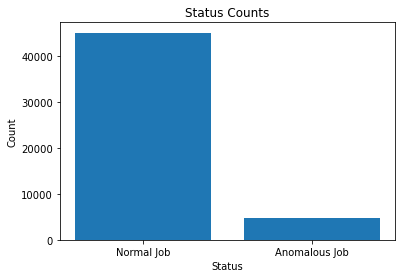

In [20]:
status_counts = jobs['Anomalous'].value_counts()
status_labels = ['Normal Job' if idx == 0 else 'Anomalous Job' for idx in status_counts.index]
plt.bar(status_labels, status_counts.values)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Counts')

plt.show()

In [24]:
anomalous_counts = jobs['Anomalous'].value_counts()

percentage_anomalous_1 = (anomalous_counts[1] / len(jobs)) * 100

print("Percentage of Anomalous == 1:", percentage_anomalous_1)


Percentage of Anomalous == 1: 9.62


In [26]:
# Correlation matrix
print("\nCorrelation Matrix:")
print(jobs.corr())


Correlation Matrix:
              lenght  Resource_1  Resource_2        ID  Anomalous
lenght      1.000000    0.001343   -0.006220  0.002552   0.389443
Resource_1  0.001343    1.000000   -0.649414 -0.001204   0.130402
Resource_2 -0.006220   -0.649414    1.000000  0.001187   0.132326
ID          0.002552   -0.001204    0.001187  1.000000   0.001694
Anomalous   0.389443    0.130402    0.132326  0.001694   1.000000


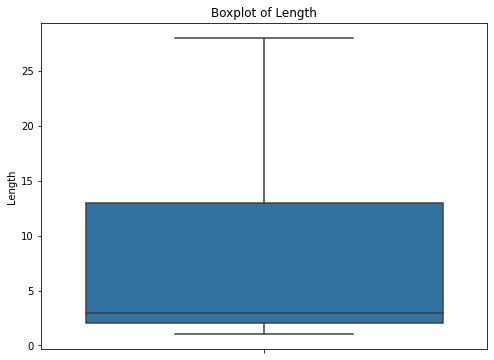

In [35]:
# Boxplot of length
plt.figure(figsize=(8, 6))
sns.boxplot(data=jobs, y='lenght')
plt.title("Boxplot of Length")
plt.ylabel("Length")
plt.show()

In [45]:
# Compute skewness of 'length'
skewness = jobs['lenght'].skew()

print("Skewness of 'lenght':", skewness)

Skewness of 'lenght': 1.1739913034266964


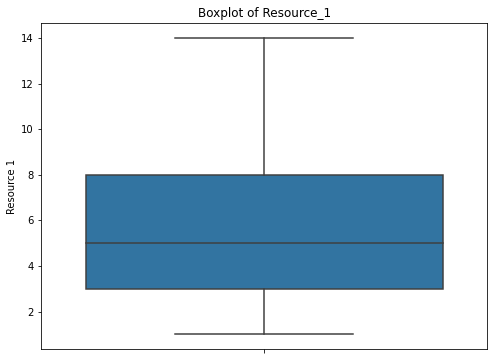

In [38]:
# Boxplot of Resource 1
plt.figure(figsize=(8, 6))
sns.boxplot(data=jobs, y='Resource_1')
plt.title("Boxplot of Resource_1")
plt.ylabel("Resource 1")
plt.show()

In [46]:
# Compute skewness of 'length'
skewness = jobs['Resource_1'].skew()

print("Skewness of 'Resource_1':", skewness)

Skewness of 'Resource_1': 0.37575247564644665


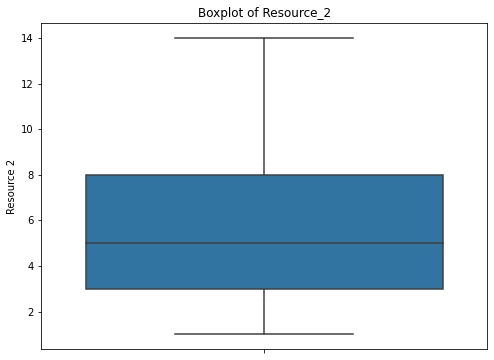

In [39]:
# Boxplot of 'length'
plt.figure(figsize=(8, 6))
sns.boxplot(data=jobs, y='Resource_2')
plt.title("Boxplot of Resource_2")
plt.ylabel("Resource 2")
plt.show()

In [47]:
# Compute skewness of 'Resource 2'
skewness = jobs['Resource_2'].skew()

print("Skewness of 'Resource_2':", skewness)

Skewness of 'Resource_2': 0.34771124226905625
